## Homework 06

**Write Your Name Here**

**DSCI 39001 - Neural Networks**

**Due Friday, March 08, 9 AM**

In this assignment, you will be asked to write a function called `convolution` that applies a given filter to an image. For this assignment, we will need the following packages:

* `numpy` - Our images will be represented as 3D numpy arrays. 
* `matplotlib.pyplot` - This will be used to dispay the images, as well as the output of the filters.
* `PIL` - We will use the Python Imaging Library to read the images from disk. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Convolution

In the cell below, create a function called `convolution`. The function should take two parameters: `image` and `fil`. The parameter `image` will be a numpy array representing an image. It will have a shape of `(rows, columns, 3)`. The parameter `fil` will be a 3x3 filter that is to be applied to the image. This will be a numpy array of shape `(3, 3, 3)`. 

The function should return a `(rows-2, columns-2)` that is calculated by applying the filter to each possible position in the image. When calculating any one specific value in the output array, you should slice an array of size `(3, 3, 3)` out of the image, multiply it by the filter, and then sum the result. 


In [2]:
def convolution(image, fil):
    # Get the number of rows and columns.
    rows = image.shape[0]
    columns = image.shape[1]
    
    # Create the results 2-d array and fill with 0s.
    results = np.zeros((rows-2, columns-2))
    
    # Calculate the value for each position that the filter can be applied to in the image.
    for i in range(rows-2):
        for j in range(columns-2):
            slice_arr = np.array(image[i:i+3, j:j+3, :])
            temp_res = slice_arr * fil
            sum_res = np.sum(temp_res)
            results[i,j] = sum_res
    
    # Return the results 2-d array.        
    return results

In the cells below, two pictures are loaded and then four filters are applied to each picture. The output of each filter is displayed. In the output images, blue pixels represent areas of positive filter activation and red pixels represent areas of negative filter activation. Run each of these cells. 

For each filter, provide a brief description of the type of visual information that filter is detecting in the image. 

## Example A: Portrait

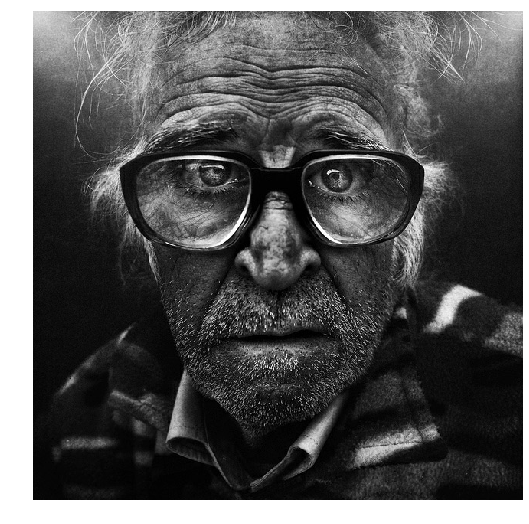

In [3]:
img1 = Image.open('Portrait.jpg')

plt.figure(figsize=[9,9])
plt.imshow(img1)
plt.axis('off')
plt.show()

In [4]:
print(type(img1))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [5]:
img1_array = np.array(img1)
print(type(img1_array))
print(img1_array.shape)

<class 'numpy.ndarray'>
(640, 640, 3)


### Example A: Filter 01

Red Channel = $\begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix}$,  Green Channel = $\begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix}$,  Blue Channel = $\begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix}$

(638, 638)


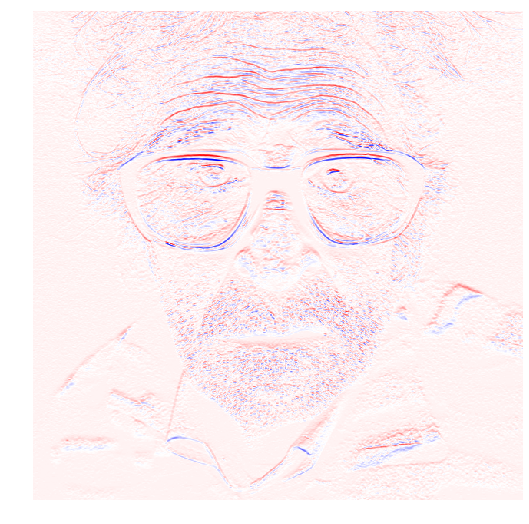

In [6]:
f01 = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
filter_01 = np.zeros((3,3,3))
filter_01[:,:,0] = f01
filter_01[:,:,1] = f01
filter_01[:,:,2] = f01

output_01 = convolution(img1_array, filter_01)
print(output_01.shape)
plt.figure(figsize=[9,9])
plt.imshow(output_01, cmap='bwr_r')
plt.axis('off')
plt.show()

**Filter 01 is detecting the bottom of horizontal edges.**

### Example A: Filter 02

Red Channel = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$,  Green Channel = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$,  Blue Channel = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$

(638, 638)


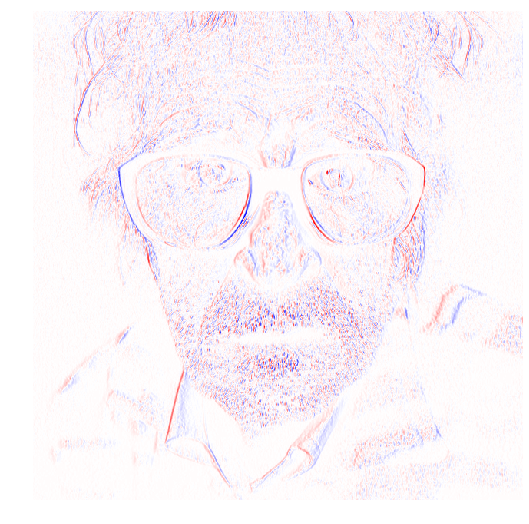

In [7]:
f02 = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
filter_02 = np.zeros((3,3,3))
filter_02[:,:,0] = f02
filter_02[:,:,1] = f02
filter_02[:,:,2] = f02
output_02 = convolution(img1_array, filter_02)
print(output_02.shape)
plt.figure(figsize=[9,9])
plt.imshow(output_02, cmap='bwr_r')
plt.axis('off')
plt.show()

**Filter 02 is detecting the right side of vertical edges.**

### Example A: Filter 03

Red Channel = $\begin{bmatrix} 1 & -1 & 0 \\ -1 & 0 & -1 \\ 0 & -1 & -1 \end{bmatrix}$,  Green Channel = $\begin{bmatrix} 1 & -1 & 0 \\ -1 & 0 & -1 \\ 0 & -1 & -1 \end{bmatrix}$,  Blue Channel = $\begin{bmatrix} 1 & -1 & 0 \\ -1 & 0 & -1 \\ 0 & -1 & -1 \end{bmatrix}$

(638, 638)


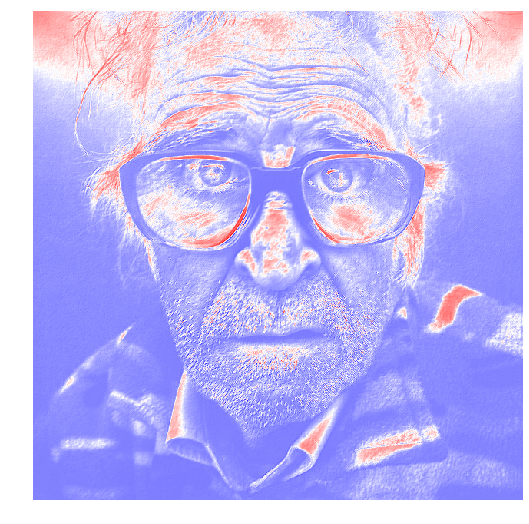

In [8]:
f03 = np.array([[1,-1,0], [-1,0,-1], [0,-1,1]])

filter_03 = np.zeros((3,3,3))
filter_03[:,:,0] = f03
filter_03[:,:,1] = f03
filter_03[:,:,2] = f03

output_03 = convolution(img1_array, filter_03)
print(output_03.shape)
plt.figure(figsize=[9,9])
plt.imshow(output_03, cmap='bwr_r')
plt.axis('off')
plt.show()

**Filter 03 is detecting angled lines going up and to the right.**

### Example A: Filter 04

Red Channel = $\begin{bmatrix} -1 & 1 & -1 \\ 1 & 0 & 1 \\ -1 & 1 & -1 \end{bmatrix}$,  Green Channel = $\begin{bmatrix} -1 & 1 & -1 \\ 1 & 0 & 1 \\ -1 & 1 & -1 \end{bmatrix}$,  Blue Channel = $\begin{bmatrix} -1 & 1 & -1 \\ 1 & 0 & 1 \\ -1 & 1 & -1 \end{bmatrix}$

(638, 638)


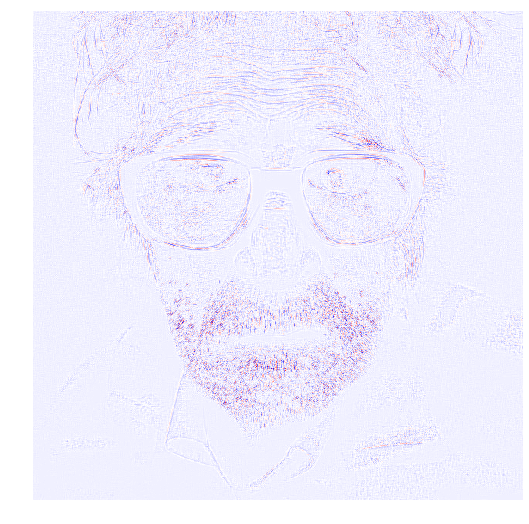

In [9]:
f04 = np.array([[-1,1,-1], [1,0,1], [-1,1,-1]])
filter_04 = np.zeros((3,3,3))
filter_04[:,:,0] = f04
filter_04[:,:,1] = f04
filter_04[:,:,2] = f04

output_04 = convolution(img1_array, filter_04)
print(output_04.shape)
plt.figure(figsize=[9,9])
plt.imshow(output_04, cmap='bwr_r')
plt.axis('off')
plt.show()

**Filter 04 is detecting a checkered pattern.**

## Example B: Burano

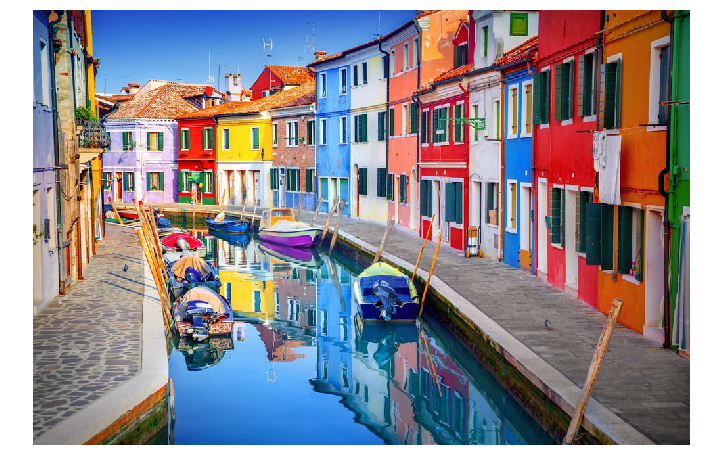

In [10]:
img2 = Image.open('Burano.jpg')

plt.figure(figsize=[12,8])
plt.imshow(img2)
plt.axis('off')
plt.show()

In [11]:
print(type(img2))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [12]:
img2_array = np.array(img2)
print(type(img2_array))

<class 'numpy.ndarray'>


In [13]:
print(img2_array.shape)

(662, 1000, 3)


### Example B: Filter 05
Red Channel = $\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$,  Green Channel = $\begin{bmatrix} -1 & -1 & -1 \\ -1 & -1 & -1 \\ -1 & -1 & -1 \end{bmatrix}$,  Blue Channel = $\begin{bmatrix} -1 & -1 & -1 \\ -1 & -1 & -1 \\ -1 & -1 & -1 \end{bmatrix}$

(660, 998)


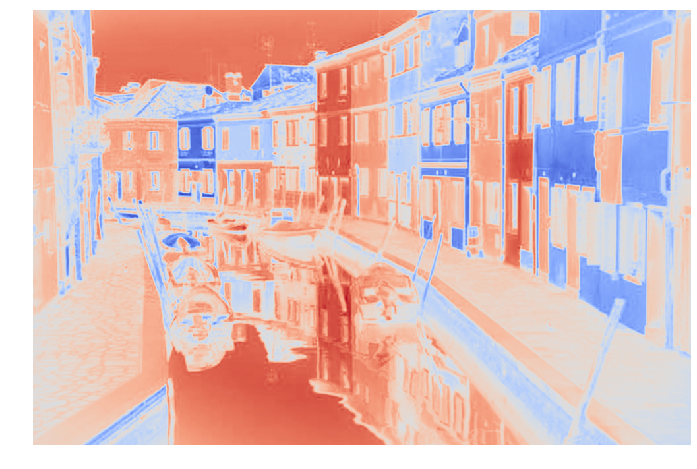

In [14]:
filter_05 = -np.ones((3,3,3))
filter_05[:,:,0] = np.ones((3,3))

output_05 = convolution(img2_array, filter_05)
print(output_05.shape)
plt.figure(figsize=[12,8])
plt.imshow(output_05, cmap='coolwarm_r')
plt.axis('off')
plt.show()

**Filter 05 is detecting red in the image.**

### Example B: Filter 06
Red Channel = $\begin{bmatrix} -1 & -1 & -1 \\ -1 & -1 & -1 \\ -1 & -1 & -1 \end{bmatrix}$,  Green Channel = $\begin{bmatrix} -1 & -1 & -1 \\ -1 & -1 & -1 \\ -1 & -1 & -1 \end{bmatrix}$,  Blue Channel = $\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

(660, 998)


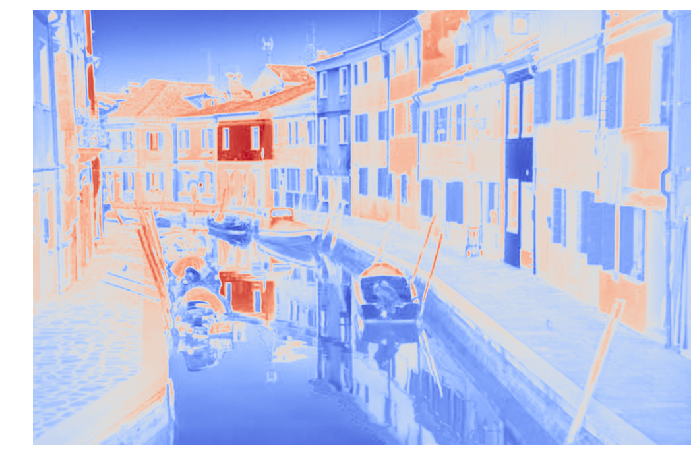

In [15]:
filter_06 = -np.ones((3,3,3))
filter_06[:,:,2] = np.ones((3,3))

output_06 = convolution(img2_array, filter_06)
print(output_06.shape)
plt.figure(figsize=[12,8])
plt.imshow(output_06, cmap='coolwarm_r')
plt.axis('off')
plt.show()

**Filter 06 is detecting blue in the image.**

### Example B: Filter 07

Red Channel = $\begin{bmatrix} -1 & -1 & -1 \\ -1 & -1 & -1 \\ -1 & -1 & -1 \end{bmatrix}$,  Green Channel = $\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$,  Blue Channel = $\begin{bmatrix} -1 & -1 & -1 \\ -1 & -1 & -1 \\ -1 & -1 & -1 \end{bmatrix}$

(660, 998)


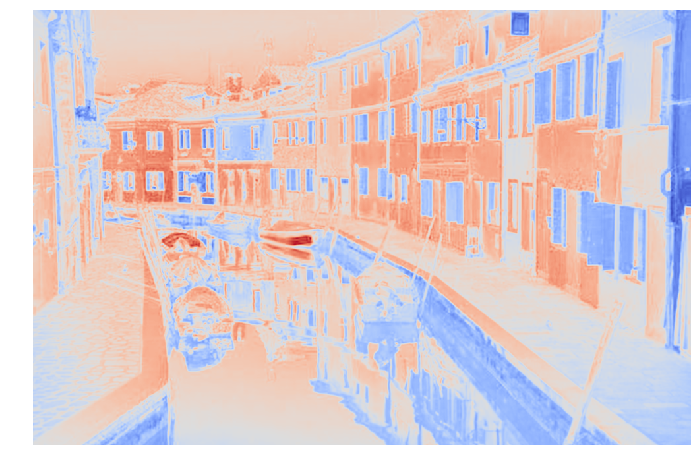

In [16]:
filter_07 = -np.ones((3,3,3))
filter_07[:,:,1] = np.ones((3,3))

output_07 = convolution(img2_array, filter_07)
print(output_07.shape)
plt.figure(figsize=[12,8])
plt.imshow(output_07, cmap='coolwarm_r')
plt.axis('off')
plt.show()


**Filter 07 is detecting green in the image.**

### Example B: Filter 08

Red Channel = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$,  Green Channel = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$,  Blue Channel = $\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$

(660, 998)


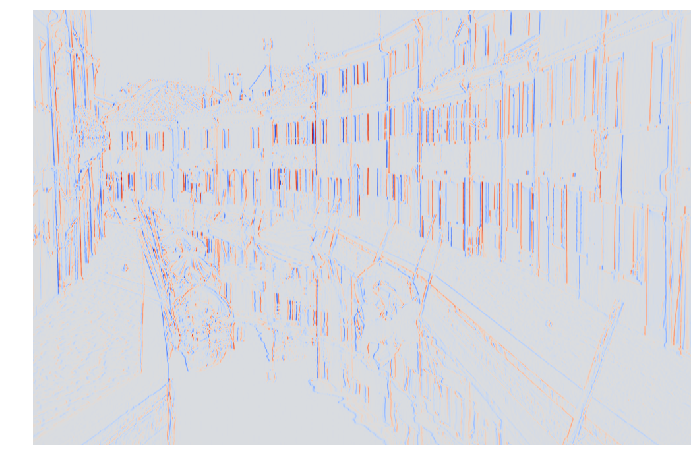

In [17]:
filter_08 = np.zeros((3,3,3))
filter_08[:,0,:] = np.ones((3,3))
filter_08[:,2,:] = -np.ones((3,3))

output_08 = convolution(img2_array, filter_08)
print(output_08.shape)
plt.figure(figsize=[12,8])
plt.imshow(output_08, cmap='coolwarm_r')
plt.axis('off')
plt.show()


**Filter 08 is detecting the right side of vertical edges.**